# DEMO MACHINE LEARNING PIPELINE WITH SCIKIT-LEARN
# (WITH TRAIN - TEST SPLIT AND VALIDATION)

In [1]:
myRandomState=0
mySampleSize=10

### DATA PREPARATION

In [2]:
# DATA PREPARATION

import pandas as pd
pd.options.display.max_rows = None
import seaborn as sns 
iris = sns.load_dataset('iris')
y = iris['species'] # Target feature to predict
X = iris.copy().drop('species', axis=1) # Predictors

print(type(iris), iris.shape)
print(type(X), X.shape)
print(type(y), y.shape)

display(X.head(5))
display(y.head(5))

<class 'pandas.core.frame.DataFrame'> (150, 5)
<class 'pandas.core.frame.DataFrame'> (150, 4)
<class 'pandas.core.series.Series'> (150,)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [3]:
# Explore data
display(X.sample(mySampleSize, random_state=myRandomState))
display(y.sample(mySampleSize, random_state=myRandomState))
# Mind that the indexes of the sample of y might be different of the indexes
# of the sample of X because of the random selection.
# When using random_state with the same state, you should get the same 
# indexes.
display(X.describe())

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
Name: species, dtype: object

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# If you want to be sure to get the same indexes, e.g. when you do not use
# random_state, extract the selected indexes from the sample of X and use
# those indexes to slice y, but this requires you to store the sample of
# X 
X_smpl = X.sample(mySampleSize)
display(X_smpl)
display(X_smpl.index)
y_smpl = y[X_smpl.index]
display(y_smpl)

,sepal_length,sepal_width,petal_length,petal_width
84,5.4,3.0,4.5,1.5
86,6.7,3.1,4.7,1.5
124,6.7,3.3,5.7,2.1
48,5.3,3.7,1.5,0.2
44,5.1,3.8,1.9,0.4
119,6.0,2.2,5.0,1.5
125,7.2,3.2,6.0,1.8
74,6.4,2.9,4.3,1.3
41,4.5,2.3,1.3,0.3
24,4.8,3.4,1.9,0.2


Index([84, 86, 124, 48, 44, 119, 125, 74, 41, 24], dtype='int64')

84     versicolor
86     versicolor
124     virginica
48         setosa
44         setosa
119     virginica
125     virginica
74     versicolor
41         setosa
24         setosa
Name: species, dtype: object

### SPLIT LABELED DATA INTO TRAIN - TEST SAMPLE

In [5]:
# SPLIT LABELED DATA INTO TRAIN - TEST SAMPLE

from sklearn.model_selection import train_test_split
# Split the data randomly into 80% training set and 20% test set
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, random_state=0, train_size=0.8)
# (use random_state to be sure that every time the same random sample is drawn)

print(type(X_tr), X_tr.shape)
print(type(X_tst), X_tst.shape)
print(type(y_tr), y_tr.shape)
print(type(y_tst), y_tst.shape)

<class 'pandas.core.frame.DataFrame'> (120, 4)
<class 'pandas.core.frame.DataFrame'> (30, 4)
<class 'pandas.core.series.Series'> (120,)
<class 'pandas.core.series.Series'> (30,)


### MODEL SELECTION AND HYPERPARAMETER SELECTION (MODEL SPECIFIC)

In [6]:
# MODEL SELECTION AND HYPERPARAMETER SELECTION (MODEL SPECIFIC)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
print(model)
# List all selected hyperparameters
print(model.get_params(deep=True))

DecisionTreeClassifier(max_depth=1)
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


### DERIVE MODEL (TRAIN MODEL/FIT MODEL)

In [7]:
# DERIVE MODEL (TRAIN MODEL/FIT MODEL)

model.fit(X_tr,y_tr)

DecisionTreeClassifier(max_depth=1)

### DISPLAY MODEL (MODEL SPECIFIC)

[Text(0.5, 0.75, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.625, 0.5, '  False')]

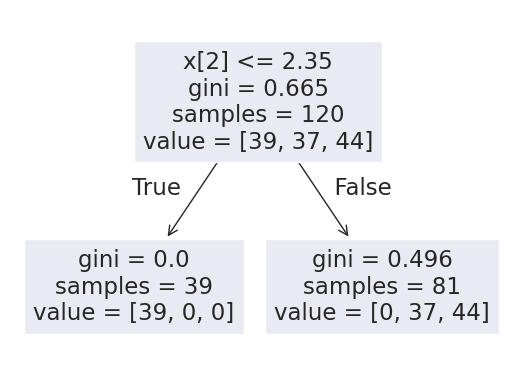

In [8]:
# DISPLAY MODEL (MODEL SPECIFIC)

from sklearn.tree import plot_tree
plot_tree(model)

### VALIDATE MODEL USING TEST DATA

In [9]:
# VALIDATE MODEL USING TEST DATA

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt

# Predict target feature for the test data
y_tst_pred = pd.Series(model.predict(X_tst), name='y_tst_pred')

# Calculate the difference between predicted and real values for the test data
err = pd.Series(y_tst_pred.reset_index(drop=True)!=y_tst.reset_index(drop=True), name='err').astype(int)
display(pd.concat([y_tst.reset_index(drop=True), y_tst_pred.reset_index(drop=True), err], axis=1))

,species,y_tst_pred,err
0,virginica,virginica,0
1,versicolor,virginica,1
2,setosa,setosa,0
3,virginica,virginica,0
4,setosa,setosa,0
5,virginica,virginica,0
6,setosa,setosa,0
7,versicolor,virginica,1
8,versicolor,virginica,1
9,versicolor,virginica,1


Predicted label
['setosa', 'versicolor', 'virginica']
[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


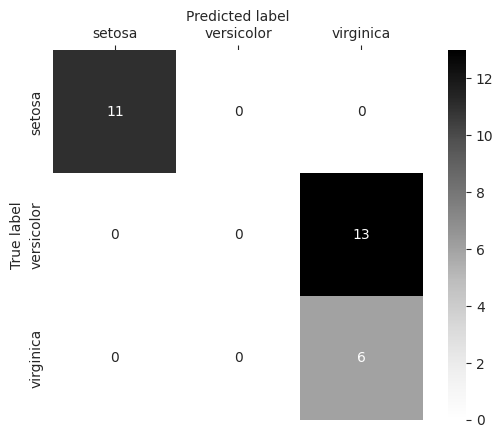

In [10]:
# Confusion matrix
# Display as text (console output)
class_labels = sorted(list(pd.concat([y_tst,y_tst_pred], axis=0).unique()))
# Alternative : model.classes_
cm = confusion_matrix(y_true = y_tst, y_pred = y_tst_pred) 
print('Predicted label')
print(class_labels)
print(cm)
# Display as heatmap (nicer output in Jupyter)
disp = sns.heatmap(cm, square=True, annot=True, cbar=True, cmap='Greys', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
disp.xaxis.tick_top()                # Put x-axis tickers on top
disp.xaxis.set_label_position('top') # Put x-axis label on top

In [12]:
# Metrics
acc = accuracy_score(y_true=y_tst, y_pred=y_tst_pred)
prec = precision_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
rec = recall_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
f1 = f1_score(y_true=y_tst, y_pred=y_tst_pred, average='weighted')
# Mind this is a multiclass classification problem, so precision, recall and F1 
# is calculated by class and averaged.
print(f'ACC : {acc:.3f} - PREC : {prec:.3f} - REC : {rec:.3f} - F1 : {f1:.3f}')


ACC : 0.567 - PREC : 0.430 - REC : 0.567 - F1 : 0.463


/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# The easiest way to get results by class is to use precision_recall_fscore_support
classes = sorted(list(pd.concat([y_tst,y_tst_pred], axis=0).unique()))
# Display precision/recall/fscore/support table as text (consule output)
display(precision_recall_fscore_support(y_true=y_tst, y_pred=y_tst_pred))
# Display precision/recall/fscore/support as pandas dataframe (nicer outputin Jupyter)
display(pd.DataFrame(precision_recall_fscore_support(y_true=y_tst, y_pred=y_tst_pred), index=['prec','rec','fscore','sup'], columns=classes))

/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(array([1.        , 0.        , 0.31578947]),
 array([1., 0., 1.]),
 array([1.  , 0.  , 0.48]),
 array([11, 13,  6]))

/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,setosa,versicolor,virginica
prec,1.0,0.0,0.315789
rec,1.0,0.0,1.000000
fscore,1.0,0.0,0.480000
sup,11.0,13.0,6.000000


In [14]:
# Or use classification_report
print(classification_report(y_true=y_tst, y_pred=y_tst_pred, target_names=class_labels))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.00      0.00      0.00        13
   virginica       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30



/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anir333/venv/ds2_dai3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

# APPLY MODEL ON NEW DATA

In [15]:
# APPLY MODEL ON NEW DATA

X_pred = pd.DataFrame([[10,10,10,10],[5,5,5,5]], columns=(X.columns))
y_pred = model.predict(X_pred)
print(y_pred)


['virginica' 'virginica']
